In [1]:
import Pkg
Pkg.activate(".")




  Activating new project at `c:\Users\jachy\OneDrive\IES\mgr\3.semestr\Fineco\assignement1`


In [2]:
Pkg.status()

Status `C:\Users\jachy\OneDrive\IES\mgr\3.semestr\Fineco\assignement1\Project.toml` (empty project)


In [ ]:
# Pkg.add("DrWatson")
# using DrWatson
# initialize_project("Assignment1"; authors = "Jáchym Janů")
# Pkg.add(["Distributions", "Plots", "ForwardDiff" , "Optim" , "MarketData" , "YFinance" , "ARCHModels", "CSV", "DataFrames"])

   Resolving package versions...
     Project No packages added to or removed from `C:\Users\jachy\OneDrive\IES\mgr\3.semestr\Fineco\assignement1\Project.toml`
    Manifest No packages added to or removed from `C:\Users\jachy\OneDrive\IES\mgr\3.semestr\Fineco\assignement1\Manifest.toml`


In [97]:
using Distributions
using Plots; gr()
using ForwardDiff
using Optim
using MarketData
using YFinance
using ARCHModels
using CSV
using DataFrames
using Plots.PlotMeasures

In [31]:
# Load the VTYX data
file_path = "VTYX.txt"
column_names = [
    :Date, 
    :Time, 
    :Open, 
    :High, 
    :Low, 
    :Close, 
    :Volume
]

VTYX_data = CSV.read(
    file_path, 
    DataFrame, 
    delim=',',            
    ignorerepeated=true,
    header=column_names 
)


println(first(VTYX_data, 5))
println(last(VTYX_data, 5))

5×7 DataFrame
 Row │ Date        Time      Open     High     Low      Close    Volume 
     │ String15    Time      Float64  Float64  Float64  Float64  Int64  
─────┼──────────────────────────────────────────────────────────────────
   1 │ 10/21/2021  11:30:00  18.65      19.44    18.65    19.44  335243
   2 │ 10/21/2021  11:35:00  19.78      19.78    18.53    19.01  118936
   3 │ 10/21/2021  11:40:00  19.03      19.37    19.0     19.25   30569
   4 │ 10/21/2021  11:45:00  19.2995    20.65    19.03    20.21   51825
   5 │ 10/21/2021  11:50:00  20.08      20.22    19.33    19.99   17243
5×7 DataFrame
 Row │ Date        Time      Open     High     Low      Close    Volume 
     │ String15    Time      Float64  Float64  Float64  Float64  Int64  
─────┼──────────────────────────────────────────────────────────────────
   1 │ 01/07/2025  15:50:00    2.515    2.525     2.51    2.525   16733
   2 │ 01/07/2025  15:55:00    2.525    2.53      2.51    2.515   37996
   3 │ 01/07/2025  16:00:00   

In [32]:
begining = DateTime(2021, 10, 21)
finish = DateTime(2025, 01, 08)

VTYX_data_01 = yahoo(:VTYX, YahooOpt(period1 = begining, period2 = finish, interval = "1d"))

head(VTYX_data_01, 5)


5×6 TimeArray{Float64, 2, Date, Matrix{Float64}} 2021-10-21 to 2021-10-27
┌────────────┬───────┬────────┬────────┬───────┬──────────┬──────────┐
│            │ Open  │ High   │ Low    │ Close │ AdjClose │ Volume   │
├────────────┼───────┼────────┼────────┼───────┼──────────┼──────────┤
│ 2021-10-21 │ 18.65 │  22.38 │  18.53 │ 21.02 │    21.02 │ 1.6901e6 │
│ 2021-10-22 │ 21.07 │   26.0 │  16.32 │ 18.65 │    18.65 │ 921500.0 │
│ 2021-10-25 │ 17.78 │  20.69 │ 17.107 │  19.0 │     19.0 │ 461900.0 │
│ 2021-10-26 │  20.0 │   20.0 │   17.0 │ 17.24 │    17.24 │ 247900.0 │
│ 2021-10-27 │ 17.42 │ 19.934 │   17.4 │ 19.57 │    19.57 │ 509100.0 │
└────────────┴───────┴────────┴────────┴───────┴──────────┴──────────┘

In [33]:
tail(VTYX_data_01, 5)

5×6 TimeArray{Float64, 2, Date, Matrix{Float64}} 2024-12-31 to 2025-01-07
┌────────────┬──────┬───────┬───────┬───────┬──────────┬──────────┐
│            │ Open │ High  │ Low   │ Close │ AdjClose │ Volume   │
├────────────┼──────┼───────┼───────┼───────┼──────────┼──────────┤
│ 2024-12-31 │ 2.24 │  2.25 │ 2.095 │  2.19 │     2.19 │ 1.6273e6 │
│ 2025-01-02 │ 2.22 │  2.24 │  2.12 │  2.14 │     2.14 │ 1.4271e6 │
│ 2025-01-03 │ 2.14 │  2.56 │  2.14 │  2.49 │     2.49 │ 2.9679e6 │
│ 2025-01-06 │ 2.49 │  2.52 │  2.35 │  2.42 │     2.42 │ 2.4247e6 │
│ 2025-01-07 │ 2.44 │ 2.605 │ 2.421 │  2.52 │     2.52 │  1.285e6 │
└────────────┴──────┴───────┴───────┴───────┴──────────┴──────────┘

[Date("2021-10-21"), Date("2021-10-22"), Date("2021-10-25"), Date("2021-10-26"), Date("2021-10-27")]


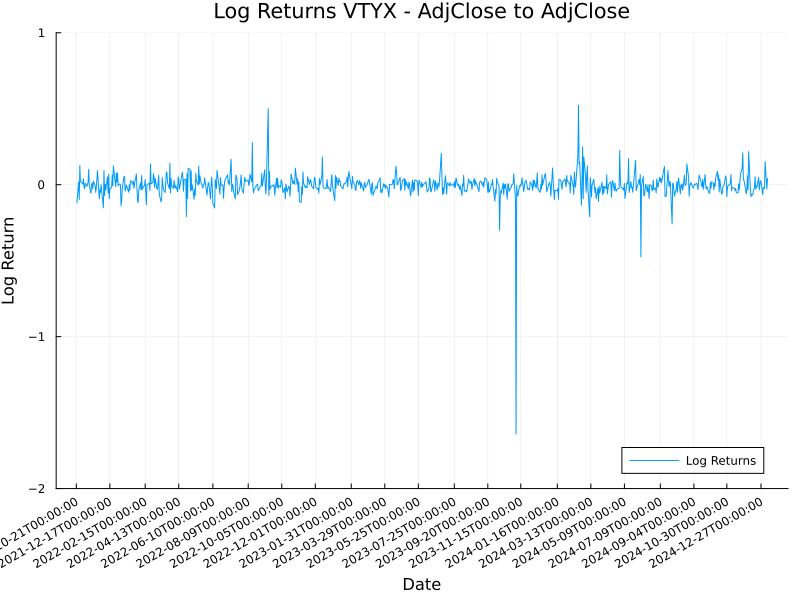

In [111]:
AdjClose = VTYX_data_01[:AdjClose]
dates = timestamp(AdjClose)

println(first(dates, 5))

plot(log.(AdjClose ./ lag(AdjClose)), 
    title = "Log Returns VTYX - AdjClose to AdjClose",
    label = "Log Returns",
    xlabel = "Date",
    ylabel = "Log Return",
    legend = :bottomright,
    xticks = dates[1:40:end],
    xrotation = 30,
    ylims = (-2, 1),
    size = (800,600),
    bottom_margin = 20px
     )
